# Methoden en Technieken -- Blok 1



## Huiswerk Opdracht 1

In deze huiswerkopdracht zal je

* enkele $k$-nearest-neighbors-modellen maken en de resultaten interpreteren,
* enkele keuzes die je kan maken voor $k$-nearest-neighbors-modellen leren kennen,
* het concept van *bias-variance trade off* aan de hand van enkele voorbeelden bestuderen.

In [22]:
# Gebruikte libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Bredere plots en een wat groter lettertype in een notebook is wel fijn
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 16})

### Onderdeel 1

De volgende code maakt een kleine gesimuleerde dataset aan.

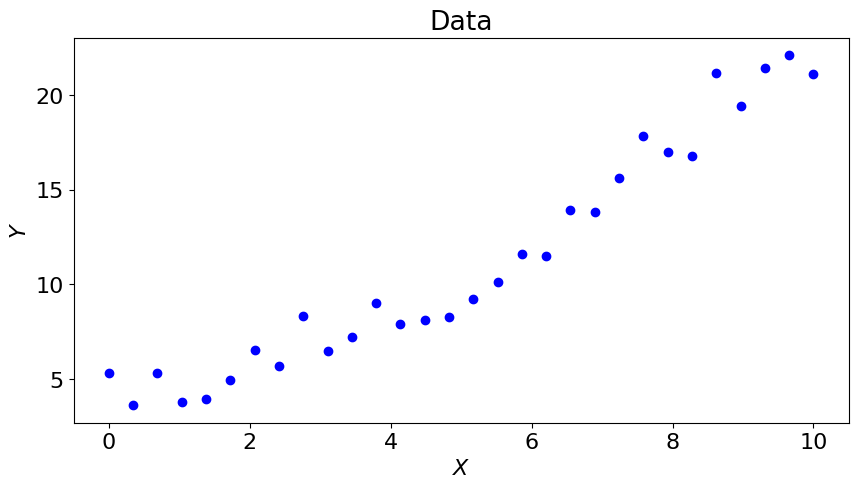

In [23]:
# We simuleren data y = f(x), met het volgende verband
def f(x):
    return (x+5)**2/10 + np.sin(x)

# Maak data aan
np.random.seed(1407)
# sklearn wilt data graag in kolom (30,1) vorm
x_train = np.linspace(0,10,30).reshape(30,1)
y_train = f(x_train) + np.random.normal(size=(30,1))
# print(x_train)

# Plot data
plt.plot(x_train, y_train, 'bo')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Data')
plt.show()

#### Opdracht 1a

De eerste opdracht is om negen $k$-*nearest-neighbor* modellen voor deze dataset, met bijbehorende voorspellingen, te maken met verschillende waarden voor $k$. De waarden voor $k$ zitten in de volgende lijst.

In [24]:
KK = [1,2,3,5,10,15,20, 24, 28]

De volgende code maakt een $5$-*nearest-neighbor* model en plot de voorspellingskromme $\hat f_5(x)$ met de data.

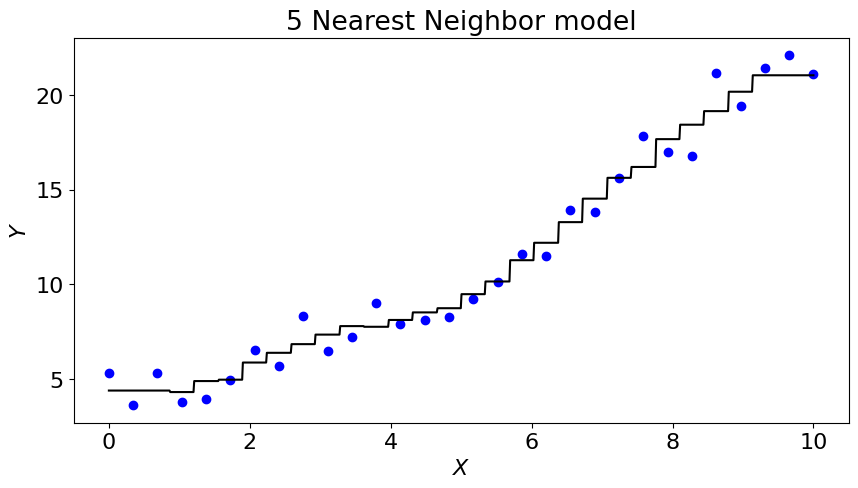

In [25]:
# Maak model
model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)

# Maak voorspellingskromme
pred_x = np.linspace(0,10,1000).reshape(-1,1)
pred_y = model.predict(pred_x)

# Plot data en voorspellingskromme
plt.plot(x_train, y_train, 'bo')
plt.plot(pred_x, pred_y, 'k-')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('5 Nearest Neighbor model')
plt.show()

Pas bovenstaande code aan en maak nu 9 modellen $\hat f_k(x)$ voor $k \in KK$ en maak een $3 \times 3$ plot van de data en deze voorspellingskrommes.

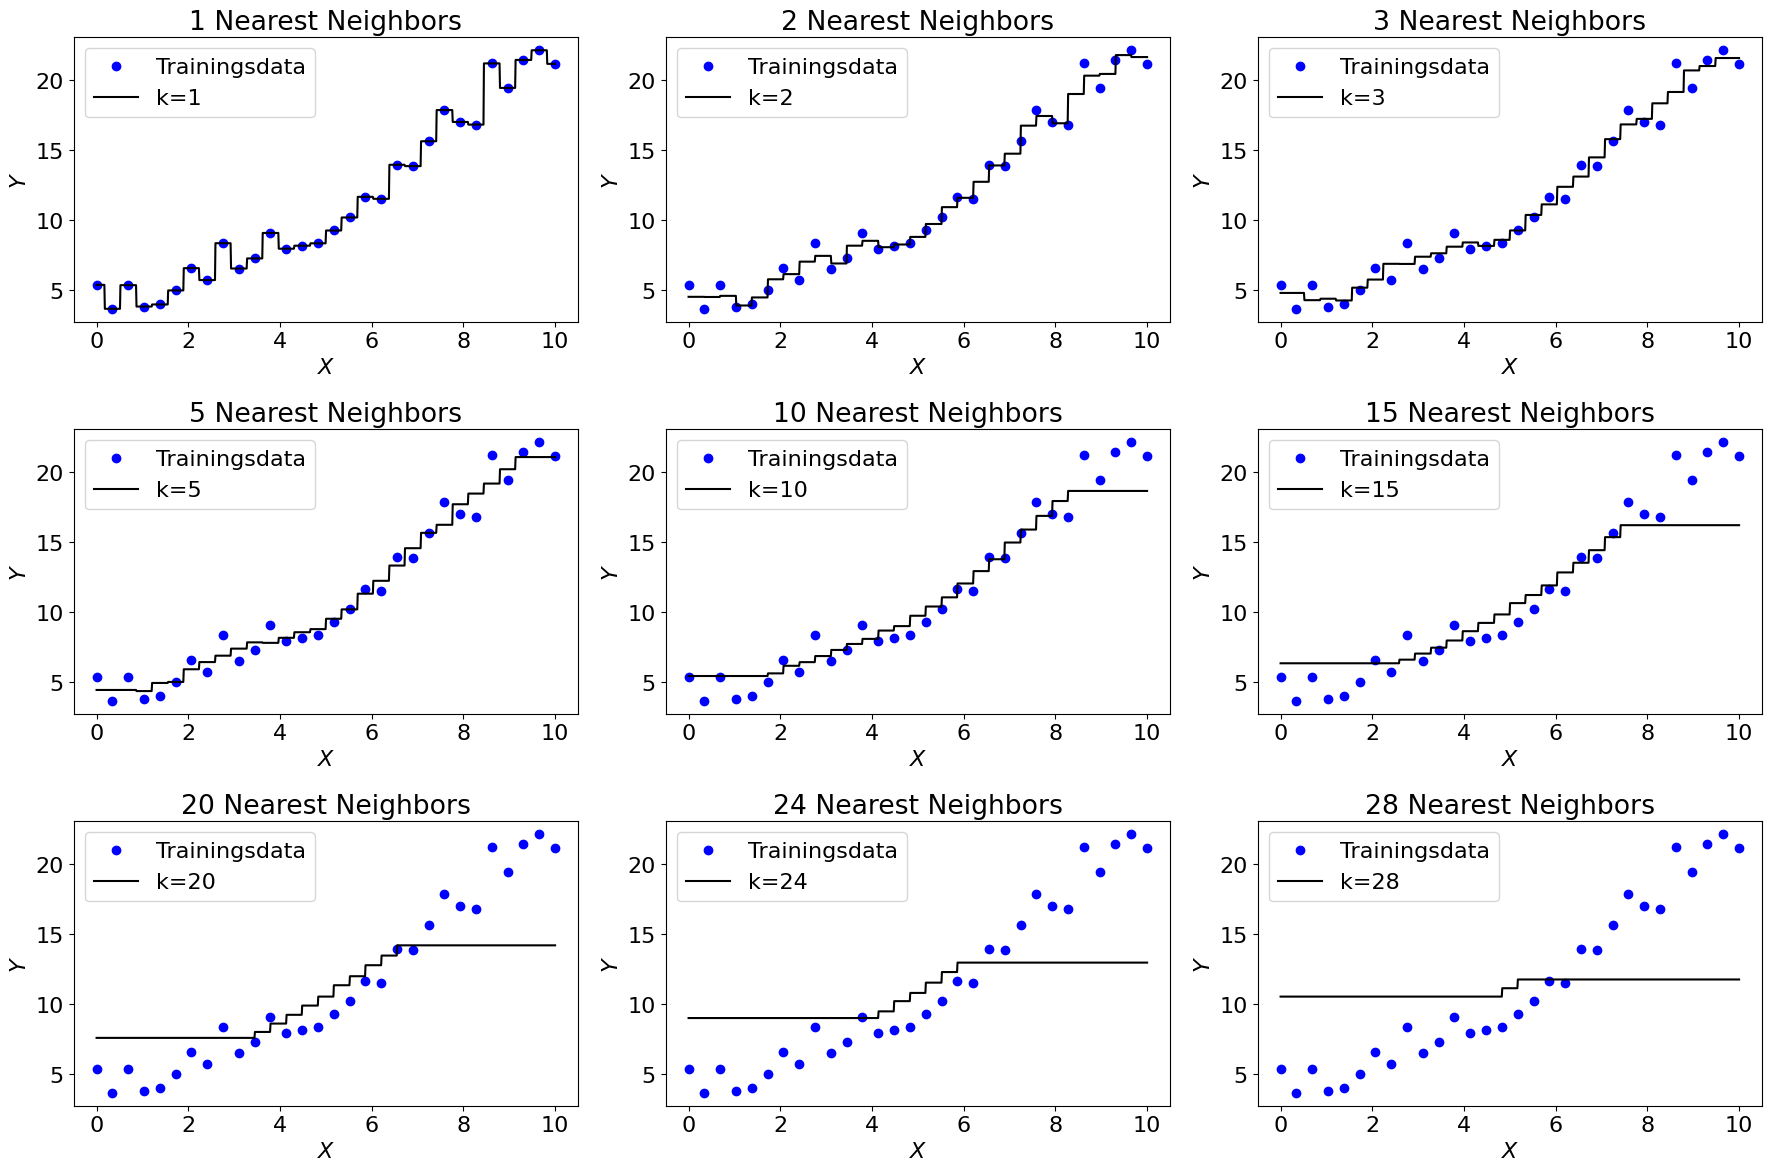

Aantal unieke waarden van f^ op trainingsdata per k:
k=1: aantal unieke f^ = 30
k=2: aantal unieke f^ = 23
k=3: aantal unieke f^ = 28
k=5: aantal unieke f^ = 27
k=10: aantal unieke f^ = 19
k=15: aantal unieke f^ = 18
k=20: aantal unieke f^ = 10
k=24: aantal unieke f^ = 8
k=28: aantal unieke f^ = 5


In [26]:
# 3x3 plot voor de verschillende waarde
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
pred_x = np.linspace(0, 10, 1000).reshape(-1, 1)

unique_counts = []

# Gebruik de index en de waarde van KK per iteratie
for idx, k in enumerate(KK):
    # Bepaal rij en kolom in de 3x3 plot
    row, col = divmod(idx, 3)
    model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    pred_y = model.predict(pred_x)
    axes[row, col].plot(x_train, y_train, 'bo', label='Trainingsdata')
    axes[row, col].plot(pred_x, pred_y, 'k-', label=f'k={k}')
    axes[row, col].set_title(f'{k} Nearest Neighbors')
    axes[row, col].set_xlabel('$X$')
    axes[row, col].set_ylabel('$Y$')
    axes[row, col].legend()
    # Bereken aantal unieke waarden op trainingsdata
    pred_train = model.predict(x_train)
    unique_counts.append(len(np.unique(pred_train)))

plt.tight_layout()
plt.show()

print("Aantal unieke waarden van f^ op trainingsdata per k:")
for k, count in zip(KK, unique_counts):
    print(f"k={k}: aantal unieke f^ = {count}")

Bespreek de voorspellingen:

* Wat zien we bij $k=1$? Hoeveel verschillende waarden voor $\hat f_1$?
* Wat zien we bij $k=2$? Hoeveel verschillende waarden voor $\hat f_2$?
* Wat zien we bij $k=28$? Hoeveel verschillende waarden voor $\hat f_{28}$?
* Is er een algemene regel te vinden tussen $k$ en het aantal waarden voor $\hat f_k$?


## Answer

Voor k = 1 (1 nearest neighbor zijn) er 30 verwachtings waarde. 1 per x, elk punt leid tot een nieuwe sprong en er is veel overfitting.

Voor k = 2 zijn het er nog 23 de lijn wordt gladder en vooral aan t einde is er minder harde overfitting

voor k = 28 zijn er maar 5 waarden er is veel overfitting omdat er te veel vrijheid is en te veel opties zijn om uit te kiezen voor de functie

De regel is dat hoe meer neighbors mee genmomen worden, hoe minder voorspellings waarde er zijn. Dit is omdat er meer waarde komen met de zelfde voorspellings waarde


#### Opdracht 1b
Bereken de MSE (*mean squared error*) op de trainingsdata voor ieder van de 9 verschillende (geleerde) modellen.


k=1: MSE = 0.000
k=2: MSE = 0.639
k=3: MSE = 0.717
k=5: MSE = 0.768
k=10: MSE = 1.997
k=15: MSE = 5.446
k=20: MSE = 11.715
k=24: MSE = 18.811
k=28: MSE = 29.159


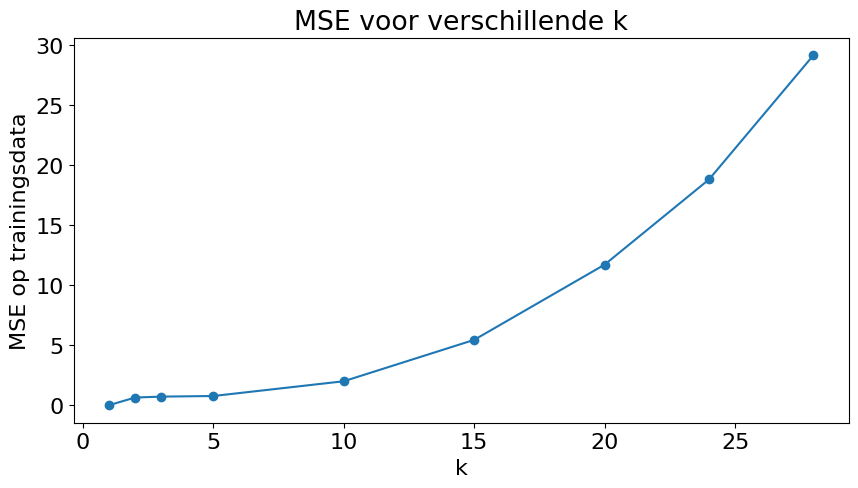

In [27]:
from sklearn.metrics import mean_squared_error

mse_scores = []

for k in KK:
    model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    y_pred = model.predict(x_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_scores.append(mse)
    print(f"k={k}: MSE = {mse:.3f}")

# Visualiseer
plt.plot(KK, mse_scores, marker='o')
plt.xlabel('k')
plt.ylabel('MSE op trainingsdata')
plt.title('MSE voor verschillende k')
plt.show()

* Welk model is flexibeler?
* Welk model voorspelt beter op de trainings data?

## Antwoord

De modellen met een lage k zijn flexibeler en voorspellen beter voor de trainings data. Hoe hoger de K hoe minder flexibel het model wordt. 

Maar dit komt natuurlijk omdat het model de train data perfect leert en na doet, dit is waarom evaluation data nodig is


#### Opdracht 1c
In de documentatie voor [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) zien we dat er nog enkele andere opties zijn waarmee we het model kunnen aanpassen.

* Uit welke *weights* kan er gekozen worden?
* Wat is de invloed van die verschillende *weights*? Bespreek één voorbeeld.
* Uit welke afstandsfuncties kan er gekozen worden?
* Wat is de invloed van die verschillende afstandsfuncties? Bespreek één voorbeeld.


#### Weights

De weights optie is default inform alle neighbors telen even veel mee voor de prediciton. Bij distance zijn de dichter gelegen neighbors belangerijker. EN er kan een eigen callable function gebruikt worden.

Bijvoorbeeld als distance gebruikt wordt en stel je hebt een aantal punten waarvan er 2 neighbors vlak bij liggen en 2 verweg. Dan tellen de dischtbijzeinde meer voor de prediction.


#### Metric

De afstands functie of metric is de formule (functie) van hoe de afstand berekent wordt. Default is dit minkowski wat een standard euclidean distance. Er is bijvoorbeeld de optie om een manhattan distance te nemen of hemels breed om de afstand te brekenen.

Bij scheve grote dimensionale data kan er een verschil zijn als er gekozen wordt voor de directe afstand eucilidisch. Of als er manhattan gebruikt wordt zoals een grid.


### Onderdeel 2

De variantie van een model is een begrip dat probeert te quantificeren hoe een model afhangt van de willekeur die aanwezig is in je steekproef (data). In het algemeen is dit een theoretisch begrip, bij een echte dataset is het meestal niet mogelijk om opnieuw data te verzamelen en te kijken hoe je model veranderd op deze nieuwe data. De *bias-variance tradeoff* is dus niet een begrip dat men uit data heeft ontdekt, maar dat statistici met pen en papier afgeleid hebben.

We gaan deze pen en papier afleiding niet nadoen, maar omdat we bij deze opdracht werken met gesimuleerde data kunnen we dit begrip wel onderzoeken door het met een computer na te bootsen.

Om dit te doen introduceren we enkele nieuwe datasets (steekproefen uit dezelfde populatie) met dezelfde $x$-waarden, maar opnieuw getrokken, verschillende $y$-waarden.

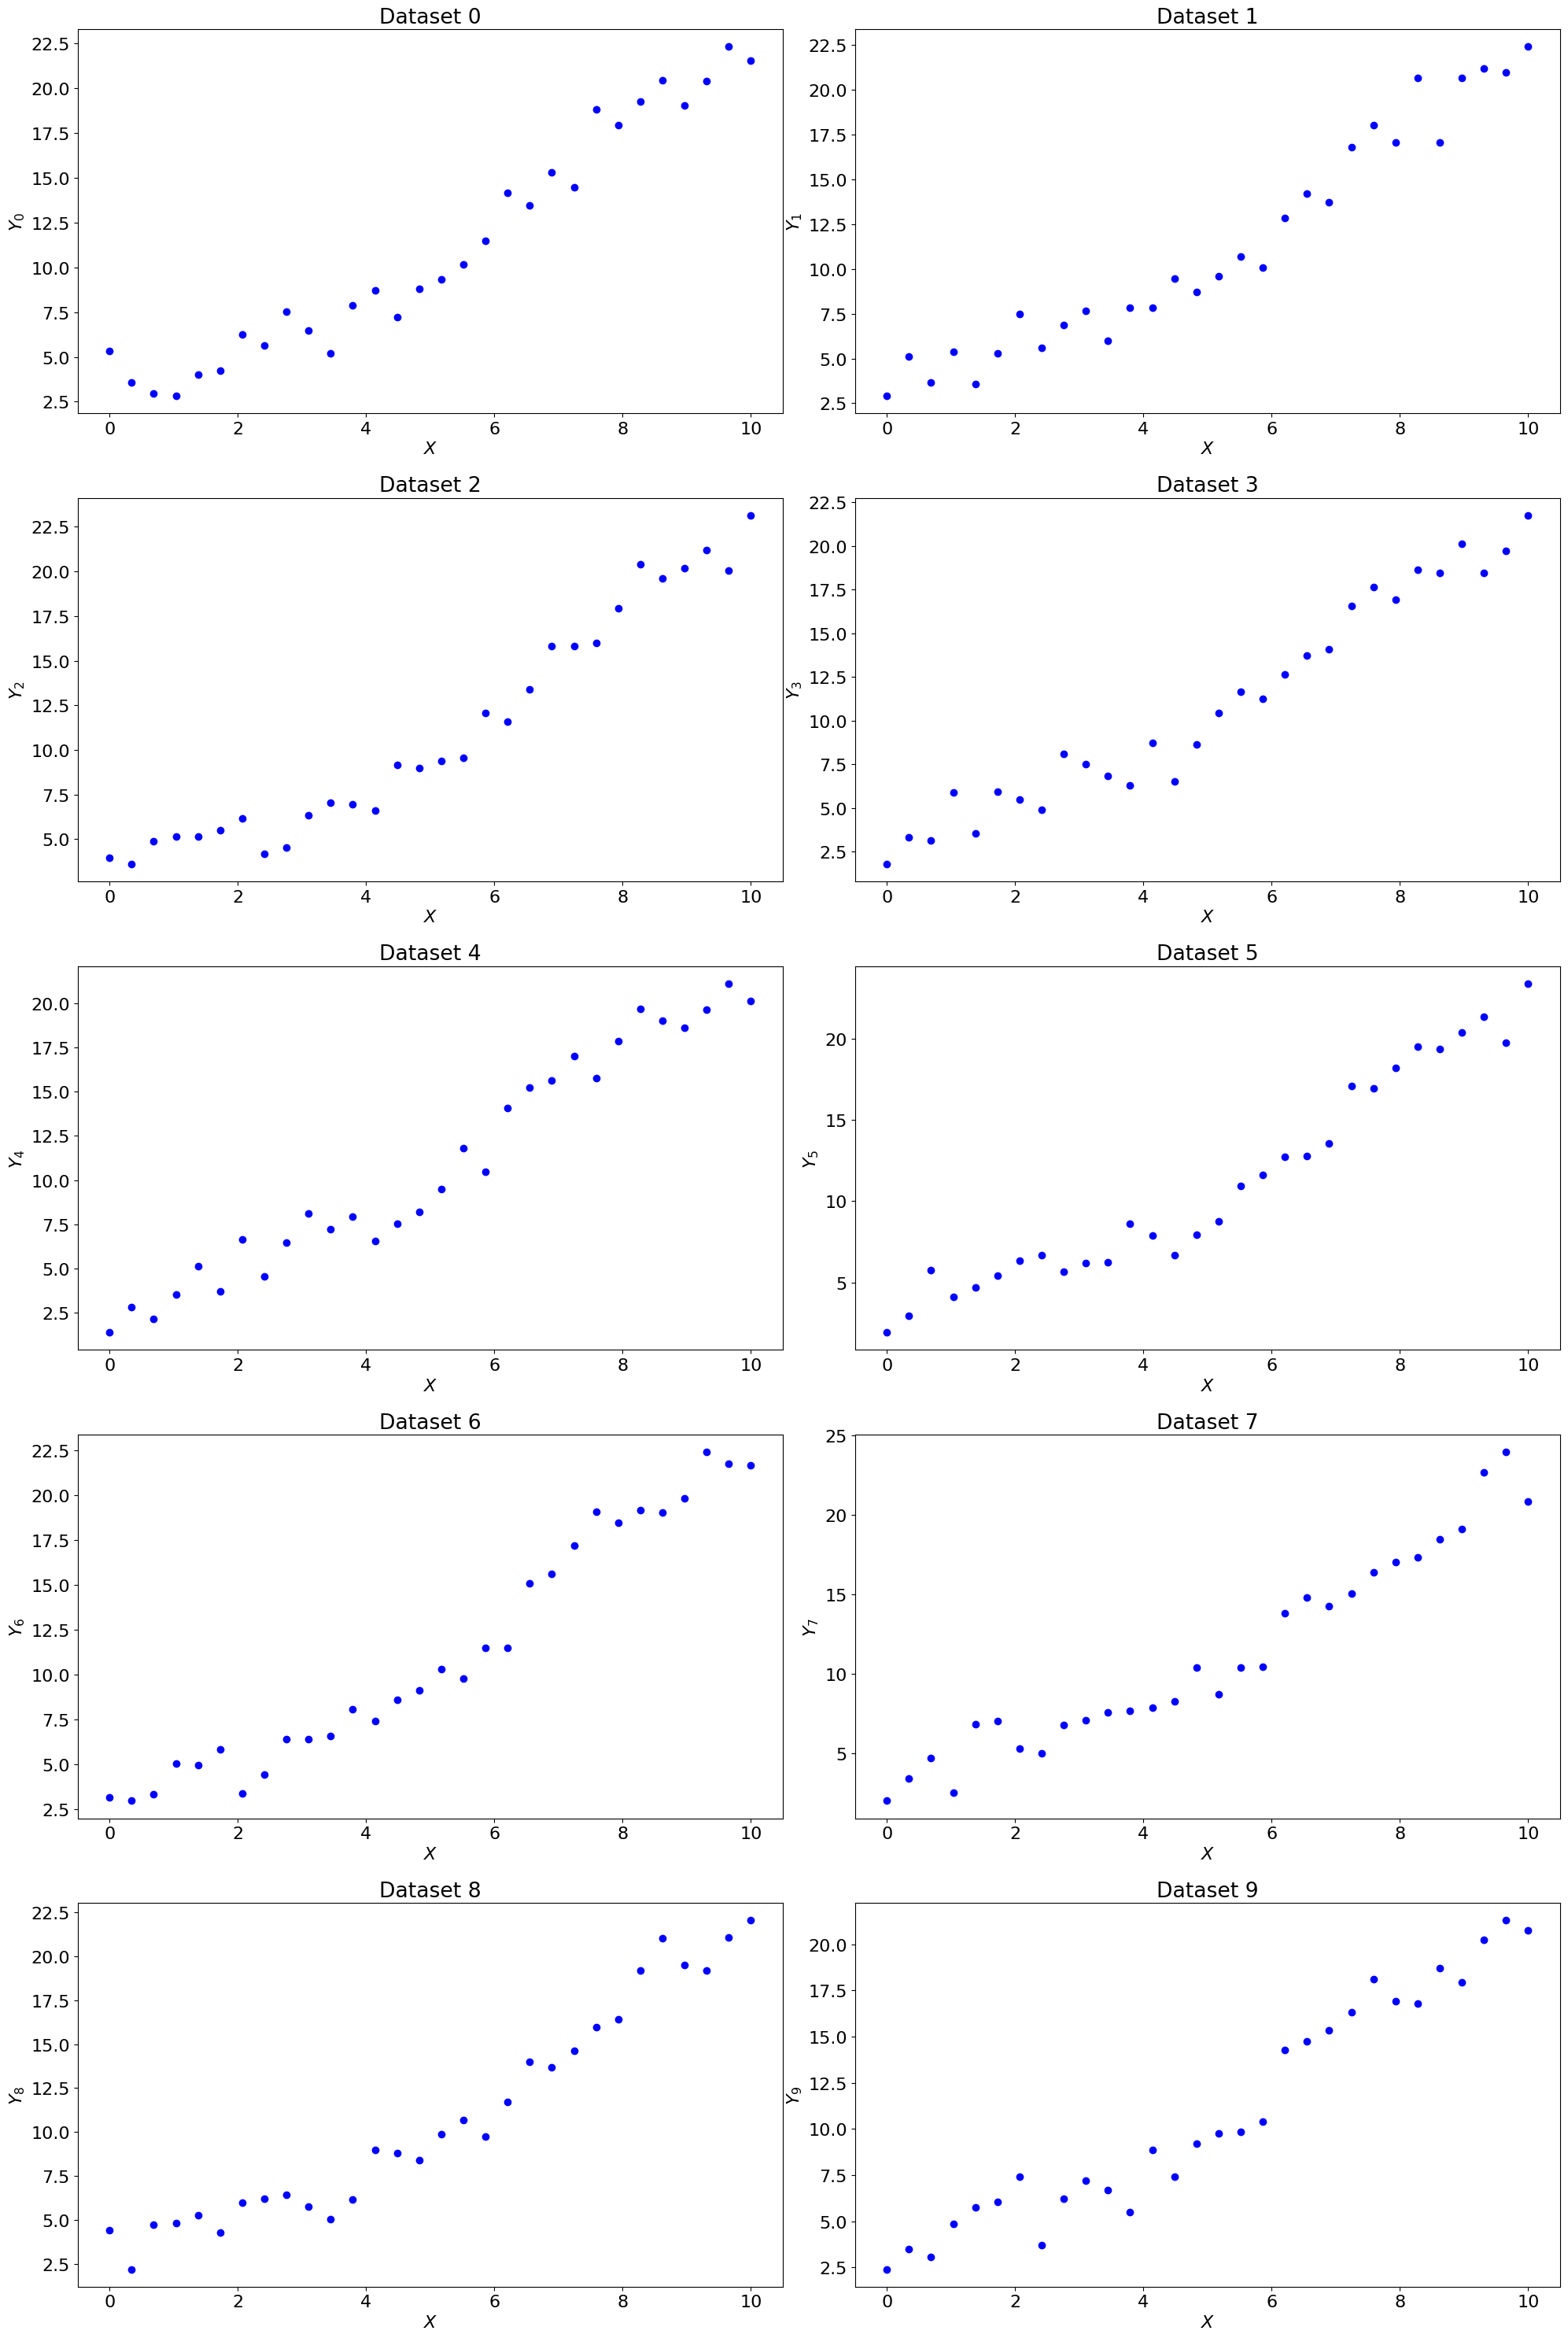

In [28]:
# Maak en reshape 10 datasets, onze y bestaat nu uit
# 30 rijen en 10 kolommen, een voor iedere dataset
np.random.seed(1407)
ys_train = f(x_train) + np.random.normal(size=(30,10))

# Maak plots
plt.figure(figsize=(20,30), layout='tight')
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.plot(x_train, ys_train[:,i], 'bo')
    plt.xlabel('$X$')
    plt.ylabel(f'$Y_{i}$')
    plt.title(f'Dataset {i}')
plt.show()

#### Opdracht 2a

Maak nu $10 \times 9$ modellen $\hat f_{k,i}(x)$ waar $\hat f_{k,i}(x)$ een $k$-nearest neighbor model is gefit op data $(x,y_i)$ met $k \in KK$ en $i = 0,1,\ldots,9$. Maak vervolgens een $3 \times 3$ plot met in iedere subplot de 10 voorspellingskrommes voor één waarde van $k$.

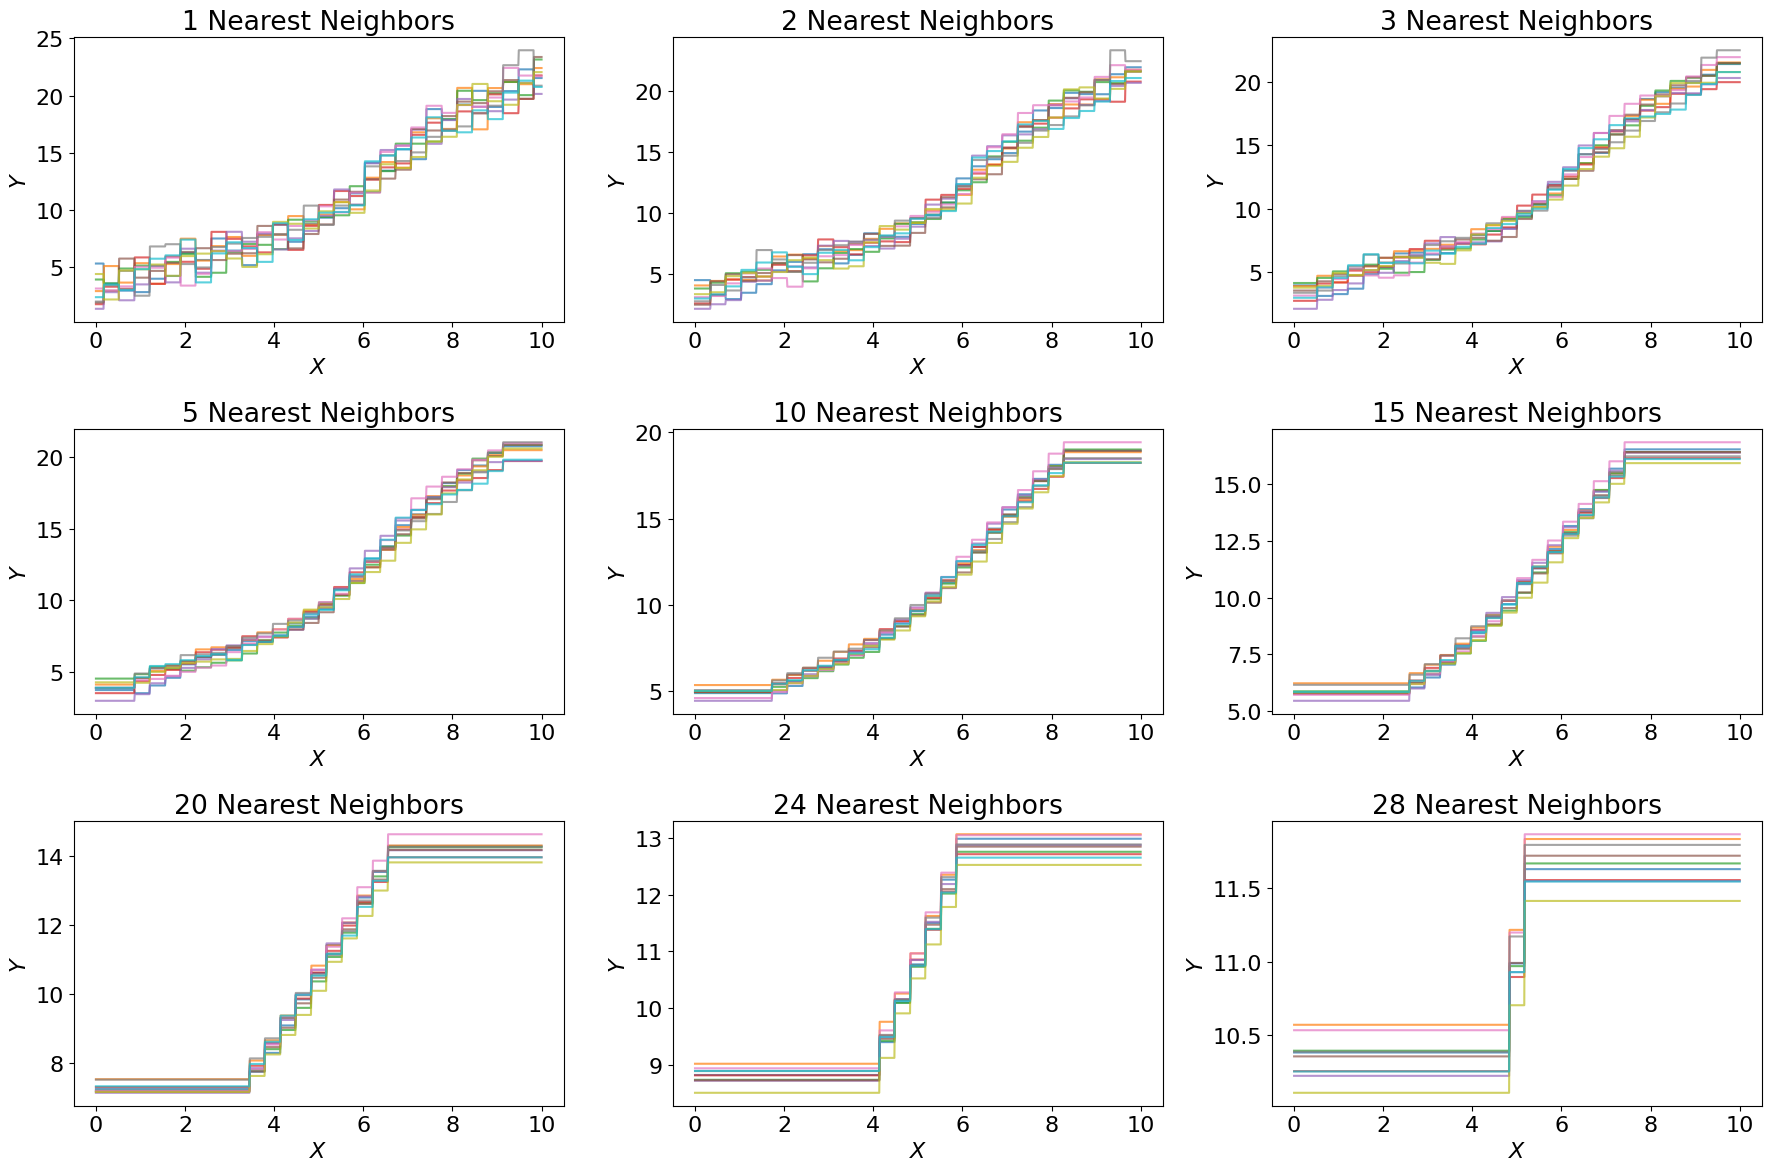

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
pred_x = np.linspace(0, 10, 1000).reshape(-1, 1)

for idx, k in enumerate(KK):
    row, col = divmod(idx, 3)
    ax = axes[row, col]
    for i in range(10):
        # Fit het model op de i-de dataset
        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, ys_train[:, i])
        pred_y = model.predict(pred_x)
        # Plot de voorspellingskromme voor deze dataset
        ax.plot(pred_x, pred_y, alpha=0.7)
    ax.set_title(f'{k} Nearest Neighbors')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')

plt.tight_layout()
plt.show()

## Note

Dit is net als het voorbeeld uit de les, met verschillende steekproeven is er te zien dat de modellen telkens van elkaar verschillen. Vooral bij het gebruik van een hoog aantal neighbors zijn de verschillen erg groot. Daarom is het nuttig om met de verschillende steek proef results en verwachte waardes de veriatie te berekenen


Een real life example is bloed druk meten, de leeftijd is X. Als je meerdere keren voor de zelfde leeftijd een bloed druk meet y. Zal de bloed druk iets kunnen schommelen door features die je niet bezit. Dit is de variance.

#### Opdracht 2b

We gaan nu de variantie van $\hat f_k$ berekenen, hiervoor geldt:

- Bij een specifieke waarde van $x$ is $Var(\hat f_k(x))$ de steekproefvariantie van de 10 waardes $\hat f_{k,i}(x)$.
- De variantie $Var(\hat f_k)$ is het gemiddelde van $Var(\hat f_k(x))$ over alle waarden van $x$.

Bereken $Var(\hat f_k)$ voor $k \in KK$ wat valt je op?

k=1: gemiddelde variantie = 0.9954
k=2: gemiddelde variantie = 0.5524
k=3: gemiddelde variantie = 0.3487
k=5: gemiddelde variantie = 0.1940
k=10: gemiddelde variantie = 0.0913
k=15: gemiddelde variantie = 0.0543
k=20: gemiddelde variantie = 0.0374
k=24: gemiddelde variantie = 0.0251
k=28: gemiddelde variantie = 0.0209


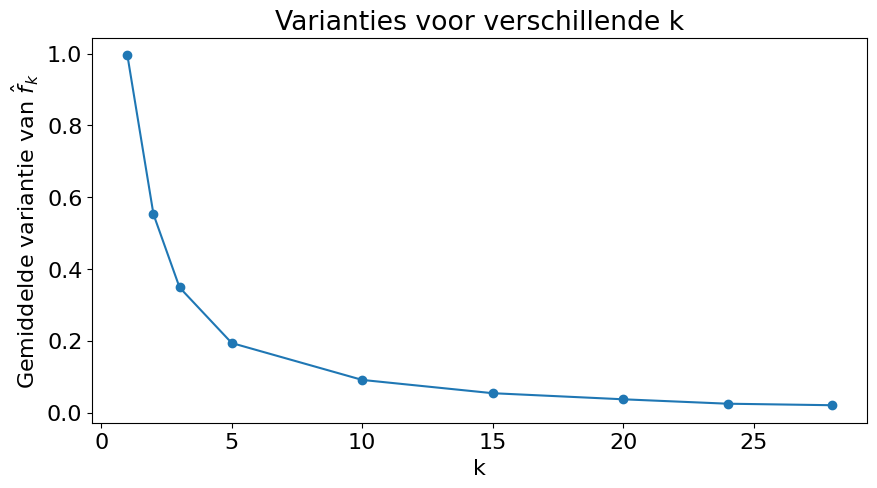

In [32]:
variances = []

for k in KK:
    preds = []
    for i in range(10):
        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, ys_train[:, i])
        pred_y = model.predict(x_train).flatten()
        preds.append(pred_y)
    preds = np.array(preds)

    # Bereken variantie per x over de 10 voorspellingen
    var_per_x = np.var(preds, axis=0, ddof=1)
    
    # Gemiddelde variantie over alle x
    mean_var = np.mean(var_per_x)
    variances.append(mean_var)
    print(f"k={k}: gemiddelde variantie = {mean_var:.4f}")

# Visualiseer
plt.plot(KK, variances, marker='o')
plt.xlabel('k')
plt.ylabel('Gemiddelde variantie van $\hat f_k$')
plt.title('Varianties voor verschillende k')
plt.show()

Wat op valt is dat de variatie hoog is voor de stricte modelen met een lage K die overfitten. Omdat ze hun data exact leren en als de data dus verschilt tussen de sets doen ze allemaalw at anders. Dit is de variance het model is zo complex dat het veel variatie heeft

Maar als de k bijvoorbeeld k28 hoog is hebben we het tegen overgestelde probleem, het model is te simpel en snapt de onderliggende patronen niet. Het model heeft een hoge bias en maakt ongeacht van de trainings data veel fouten. Maar er is dus wel weinig variatie tussen de verschillende steekproefen

### Onderdeel 3

Omdat dit gesimuleerde data is weten we expliciet de functie $f$ en de grootte van de storingsterm $\varepsilon$ die we gebruikt hebben om de de datasets te maken.
$$y = f(x)+\varepsilon \\ \textrm{met} \\ f(x)= \frac{(x+5)^2}{10} + \sin(x),$$
en $\varepsilon \sim N(0,1)$. Dit gaan we gebruiken om de afweging tussen *bias* en *variantie* te onderzoeken.

#### Opdracht 3a
Eerst gaan we per $k$ de gekwadrateerde *bias* $B(\hat f_k)^2$ schatten, hiervoor geldt:

- Bij een specifieke waarde van $x$ is $B(\hat f_k(x))$ de gemiddelde afwijking tussen $\hat f_{k,i}(x)$ en $f(x)$ genomen over de 10 verschillende voorspellingskrommes.
- De gekwadrateerde *bias* $B(\hat f_k)^2$ is het gemiddelde van $B(\hat f_k(x))^2$ over alle waarden van $x$.

Bereken $B(\hat f_k)^2$ voor $k \in KK$, wat valt je op?


k=1: gekwadrateerde bias = 0.1197
k=2: gekwadrateerde bias = 0.1916
k=3: gekwadrateerde bias = 0.0742
k=5: gekwadrateerde bias = 0.2076
k=10: gekwadrateerde bias = 1.2364
k=15: gekwadrateerde bias = 4.4646
k=20: gekwadrateerde bias = 11.1833
k=24: gekwadrateerde bias = 19.2295
k=28: gekwadrateerde bias = 30.0645


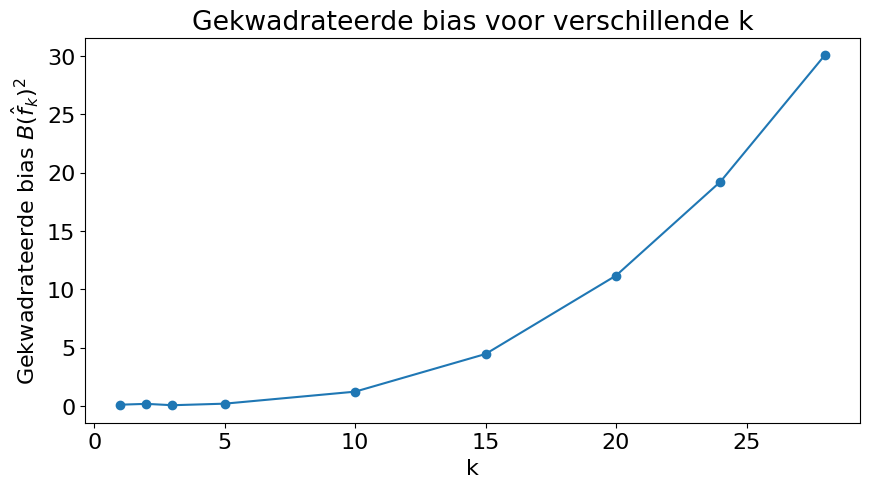

In [33]:
bias2_scores = []

## FX formule was de functie die de ruis toevoegde
def f(x):
    return (x+5)**2/10 + np.sin(x)

for k in KK:
    preds = []
    for i in range(10):
        model = KNeighborsRegressor(n_neighbors=k).fit(x_train, ys_train[:, i])
        pred_y = model.predict(x_train).flatten()
        preds.append(pred_y)
    preds = np.array(preds)

    # Bereken gemiddelde voorspelling per x
    mean_pred = np.mean(preds, axis=0)

    # Bereken true f(x) per x
    fx = f(x_train).flatten()

    # Bias per x
    bias_per_x = mean_pred - fx

    # Gekwadrateerde bias per x
    bias2_per_x = bias_per_x ** 2
    
    # Gemiddelde gekwadrateerde bias over alle x
    mean_bias2 = np.mean(bias2_per_x)
    bias2_scores.append(mean_bias2)
    print(f"k={k}: gekwadrateerde bias = {mean_bias2:.4f}")

# Visualiseer
plt.plot(KK, bias2_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Gekwadrateerde bias $B(\\hat f_k)^2$')
plt.title('Gekwadrateerde bias voor verschillende k')
plt.show()

Zoals eerder verwacht zijn de minder complexe modellen aan het underfitten en hebben ze een hoge bias. Hoe minder complex het model hoe hoger de bias

#### Opdracht 3b
Plot de variantie tegen de gekwadrateerde *bias*, wat valt je op? Welk model (welke $k$) zou je kiezen als je de gekwadrateerde onzuiverheid en variantie van het model zou willen balanceren?

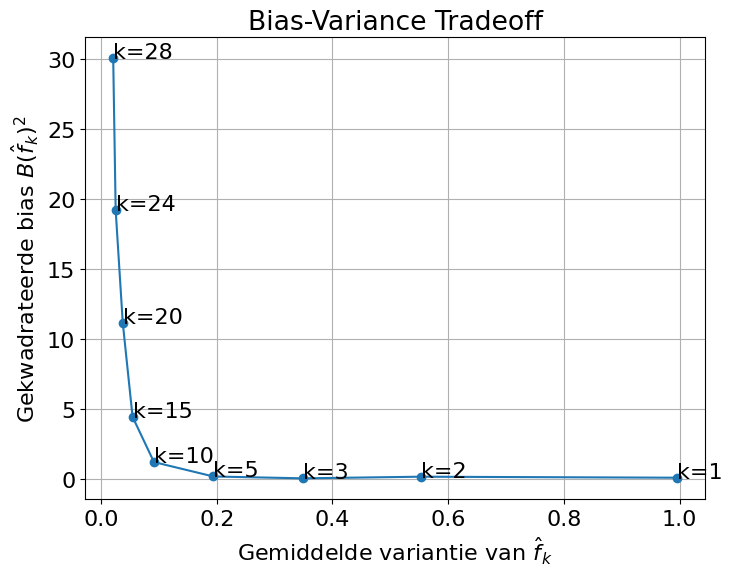

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(variances, bias2_scores, marker='o')
for i, k in enumerate(KK):
    plt.text(variances[i], bias2_scores[i], f'k={k}')
plt.xlabel('Gemiddelde variantie van $\hat f_k$')
plt.ylabel('Gekwadrateerde bias $B(\hat f_k)^2$')
plt.title('Bias-Variance Tradeoff')
plt.grid(True)
plt.show()


Hier is duidelijk te zien waarom de term de bias variance trade of is. Er moet een keuze gemaakt worden tussen de bias en variance van het model. En dus ook het over en underfitten.

Als ik een model zou moeten kiezen hier uit lijkt k=10 de duidelijke keuze. HIer is de balans het best

#### Opdracht 3c

Vanuit de theorie weten we dat de verwachte MSE afhangt van de *bias* en variantie van $\hat f$ en van de variantie van de storingen $\varepsilon$.
$$
E(MSE) = B(\hat f)^2 + Var(\hat f) + Var(\varepsilon)
$$

Maak een plot van de verwachte MSE tegen $k$.


* Welke modellen zijn complexer?
* Welke modellen hebben een hoge *bias*?
* Welke modellen hebben een hogere variantie?
* Welk model zou je kiezen?


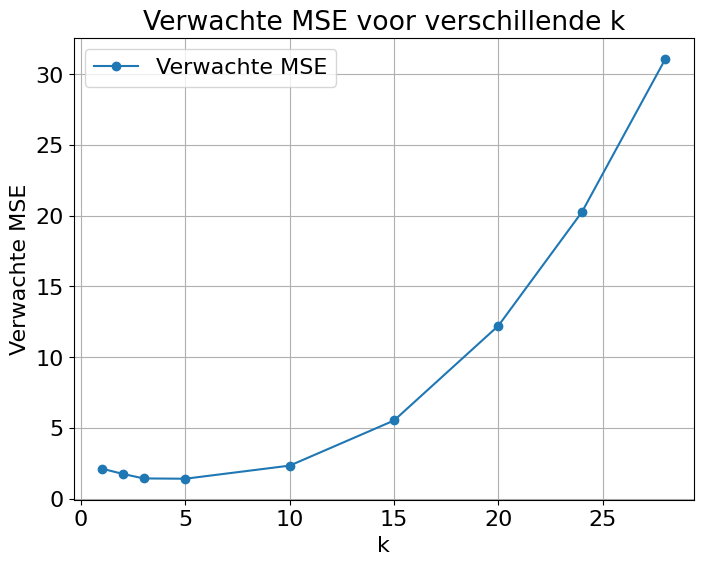

In [37]:
# Opdracht 3c: Verwachte MSE tegen k
# Volgens de theorie: E(MSE) = bias^2 + variantie + variantie van epsilon (ruis)
var_epsilon = 1  # gegeven: epsilon ~ N(0,1)
expected_mse = [b + v + var_epsilon for b, v in zip(bias2_scores, variances)]
plt.figure(figsize=(8,6))
plt.plot(KK, expected_mse, marker='o', label='Verwachte MSE')
plt.xlabel('k')
plt.ylabel('Verwachte MSE')
plt.title('Verwachte MSE voor verschillende k')
plt.grid(True)
plt.legend()
plt.show()



De modelen met een lage K zijn complexer maar hebben een hoge variatie

De simpele modellen met een hoge K leren weinig en hebben een hoge bias

Als ik naar deze chart kijk zou ik 5 kiezen omdat de MSE voor K=5 het laagst is. 

DIt laat zien dat het nuttig is de MSE te berekenen met de bias, variance en storing omdat dit het duidelijker maakt